In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
from matplotlib import rc,rcParams
rc('text', usetex=True)
rcParams['figure.figsize'] = (8, 6.5)
rcParams['ytick.labelsize'],rcParams['xtick.labelsize'] = 17.,17.
rcParams['axes.labelsize']=19.
rcParams['legend.fontsize']=17.
rcParams['axes.titlesize']=20.
rcParams['text.latex.preamble'] = ['\\usepackage{siunitx}']
#import seaborn
import sympy as sm
from scipy.integrate import odeint
sm.init_printing()

Κυλινδρικό ρολό χαρτί μήκους $h$ που αποτελείται από έναν πυρήνα ακτίνας $R_0$ και μάζας $M_0$ ξετυλίγειτε καθώς εκτοξέυεται απο ύψος $y_0$. Αρχικά το πάχος του ρολού είναι $R_E$ και το πάχος ενός φύλλου χαρτιού είναι $\delta$
Υπολογίστε τη τρόχια του. 

In [4]:
R0,M0,Re,d,t,h,w0,g,u0,y0,rhox,a,theta=sm.symbols('R_0,M_0,R_E,\\delta,t,h,\\omega_0,g,u_0,y_0,\\rho_x,a,\\theta',real=True,positive=True)

In [5]:
Vx=sm.Function('V_x',real=True)(t)
Vy=sm.Function('V_y',real=True)(t)
#M=sm.Function('V_x')(t)

Αριθμός περιστροφών δεδομένης γωνιακής ταχύτητας $\omega (t)$
$$
k(t) =\frac{\int _0 ^t \omega (t') dt'}{2\pi}
$$
άρα το πάχος του εξωτερικού στρώματος είναι
$$
R_{x}(t)=R_E - k(t) \delta
$$
και η συνολική μάζα του κυλίνδρου
$$
M(t)=M_0 +\rho _x h \pi R_{x}^2(t)
$$

In [8]:
w=w0#estw statheri gwniaki taxyttita

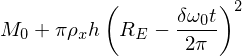

In [9]:
k= sm.integrate(w,t)/(2*sm.pi)
Rex=Re-d*k
R=R0+Rex
M=M0+rhox*h*sm.pi*Rex**2
M

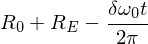

In [11]:
R

Το σύστημα των διαφορικών εξισώσεων είναι:
\begin{align}
&\frac{d}{dt}\big(M(t) V_y \big)=-M(t)g \\
&\frac{d}{dt}\big(M(t) V_x \big)=0
\end{align}

In [12]:
eqy=sm.diff(Vy*M,t)+M*g#-Vy*sm.diff(M,t)/M
eqx=sm.diff(Vx*M,t)#+Vx*sm.diff(M,t)/M

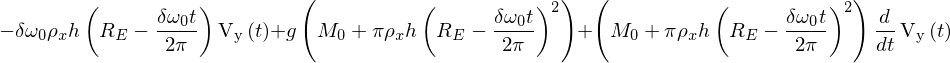

In [13]:
eqy

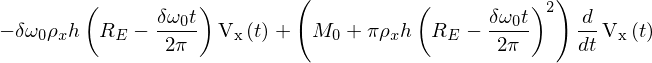

In [14]:
eqx

In [16]:
sub={R0:0.02,h:0.03,g:9.86,M0:0.050,w0:0.5*2.*np.pi,d:0.05,u0:5.0,rhox:1.5,Re:0.1,y0:100.,a:0.01}

In [17]:
sub[a]=1

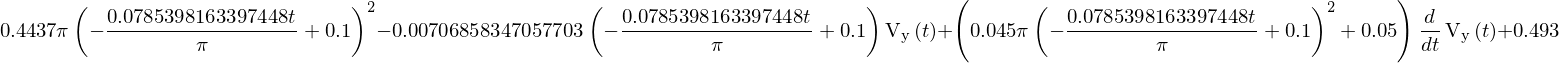

In [18]:
eqy.subs(sub)

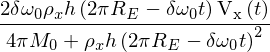

In [22]:
sm.solve(eqx,sm.diff(Vx))[0]

In [26]:
dVy=sm.solve(eqy,sm.diff(Vy))[0]
dVx=sm.solve(eqx,sm.diff(Vx))[0]

In [27]:
dVyn=sm.lambdify((Vy,t),dVy.subs(sub))
dVxn=sm.lambdify((Vx,t),dVx.subs(sub))
Rn=sm.lambdify(t,R.subs(sub))
Mn=sm.lambdify(t,M.subs(sub))

In [28]:
def DX(y,t):
    x,v=y
    dydt=[v,dVxn(v,t)]
    return dydt
def DY(y,t):
    y,v=y
    dydt=[v,dVyn(v,t)]
    return dydt

In [29]:
tt=np.linspace(0,5)
solx=odeint(DX,y0=[0.,5.],t=tt)
soly=odeint(DY,y0=[100.,0.],t=tt)

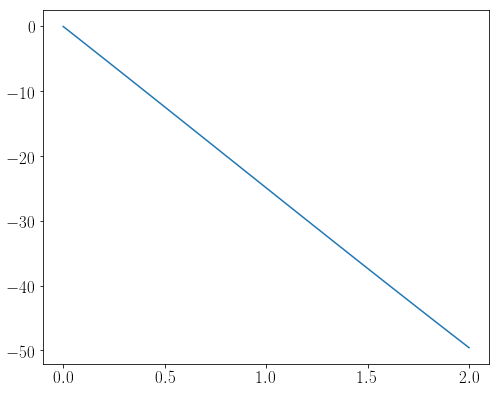

In [36]:
plt.plot(tt,soly[:,1])

In [34]:
def r(theta0=45.,tend=4.,friction=0.01,angular=0.5*2*np.pi):
    w=w0*t 
    k= sm.integrate(w,t)/(2*sm.pi)
    Rex=Re-d*k
    R=R0+Rex
    M=M0+rhox*h*sm.pi*Rex**2
    eqy=sm.diff(Vy*M,t)+M*g+a*R*Vy
    eqx=sm.diff(Vx*M,t)+a*R*Vx
    dVy=sm.solve(eqy,sm.diff(Vy))[0]
    dVx=sm.solve(eqx,sm.diff(Vx))[0]
    subk={R0:0.02,h:0.1,g:9.86,M0:0.050,w0:angular,d:0.0001,u0:5.0,rhox:500.,Re:0.05,y0:10.,a:friction}
    dVyn=sm.lambdify((Vy,t),dVy.subs(subk))
    dVxn=sm.lambdify((Vx,t),dVx.subs(subk))
    def DX(y,t):
        x,v=y
        dydt=[v,dVxn(v,t)]
        return dydt
    def DY(y,t):
        y,v=y
        dydt=[v,dVyn(v,t)]
        return dydt
    #Rn=sm.lambdify(t,R.subs(subk))
    Mn=sm.lambdify(t,M.subs(subk))
    V0y=sub[u0]*np.sin(theta0)
    V0x=sub[u0]*np.cos(theta0)
    tt=np.linspace(0,tend)
    solx=odeint(DX,y0=[0.,V0x],t=tt)
    soly=odeint(DY,y0=[subk[y0],V0y],t=tt)
    return tt,solx[:,0],soly[:,0],Mn(tt)

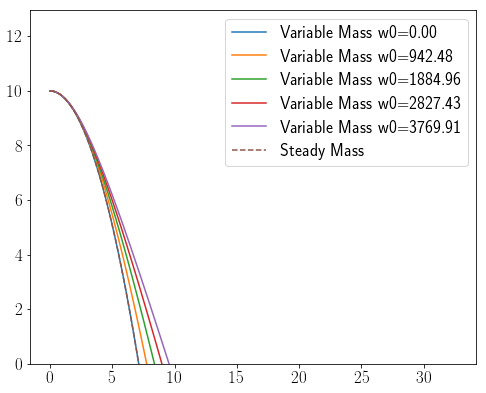

In [38]:
#for theta0 in np.linspace(0,0.75,5)*0.5*np.pi:
#for fr in np.linspace(0,1.,5):
for wr in np.linspace(0,600.,5)*2*np.pi:
    #tt,xx,yy,MM=r(tend=5,friction=0.0001,theta0=theta0)
    #plt.plot(xx,yy,label=r'Variable Mass $\theta _0={:.2}\pi$'.format(theta0/np.pi))
#     tt,xx,yy,MM=r(tend=2,friction=fr,theta0=0.,angular=2*np.pi)
#     plt.plot(xx,yy,label=r'Variable Mass a={:.2}'.format(fr))
    tt,xx,yy,MM=r(tend=2,friction=0.,theta0=0.,angular=wr)
    plt.plot(xx,yy,label=r'Variable Mass w0={:.2f}'.format(wr))
plt.plot(5.0*tt,10.-(9.86/2.)*tt**2,'--',label='Steady Mass') #apli boli
plt.legend()
plt.ylim(0,None)

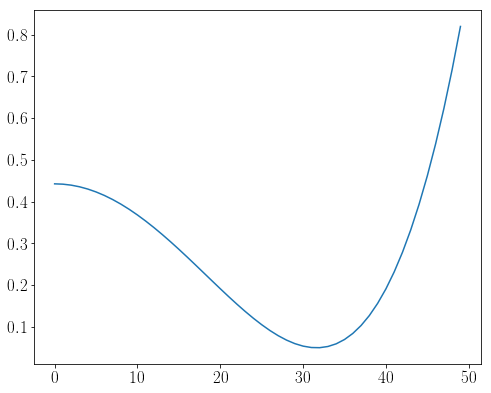

In [40]:
plt.plot(MM)

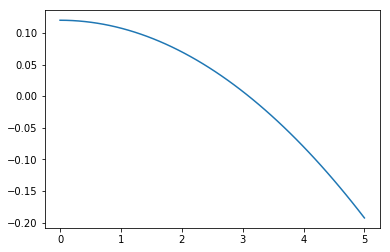

In [24]:
plt.plot(tt,Rn(tt))

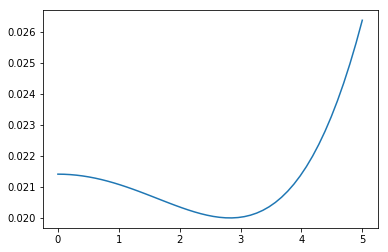

In [25]:
plt.plot(tt,Mn(tt))

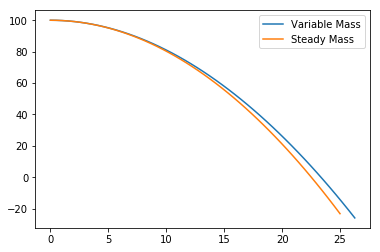

In [127]:
plt.plot(solx[:,0],soly[:,0],label='Variable Mass')
plt.plot(5.0*tt,100.-(9.86/2.)*tt**2,label='Steady Mass') #apli boli
plt.legend()

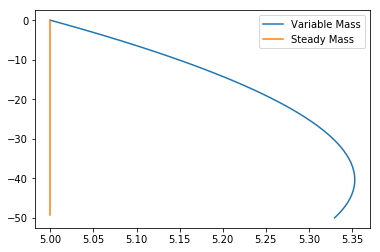

In [128]:
plt.plot(solx[:,1],soly[:,1],label='Variable Mass')
plt.plot(5.0*np.ones(tt.shape),-9.86*tt,label='Steady Mass') #apli boli
plt.legend()

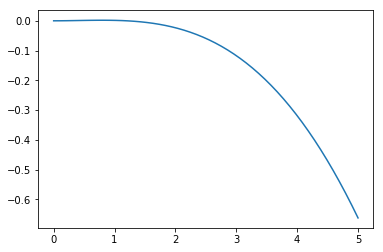

In [115]:
plt.plot(tt,solx[:,0]-5.0*tt)

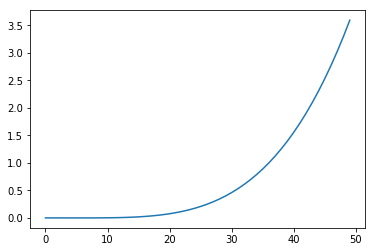

In [116]:
plt.plot(soly[:,0]-(100.-(9.86/2.)*tt**2))
#plt.plot(100.-(9.86/2.)*tt**2)

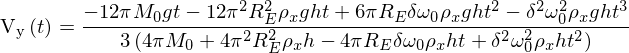

In [154]:
Vys=sm.dsolve(eqy,ics={Vy.subs(t,0):sm.Float(0)})#,ics={eqy.subs({t:0}):0})
Vys=Vys.subs('C1',0)
Vys

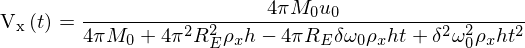

In [155]:
Vxs=sm.dsolve(eqx)
Vxs=Vxs.subs('C1',4*sm.pi*M0*u0)
Vxs

In [156]:
Vxs=Vxs.rhs
Vys=Vys.rhs

In [70]:
Vxn=sm.lambdify(t,Vxs.subs(sub),"numpy")
Vyn=sm.lambdify(t,Vys.subs(sub),"numpy")

In [105]:
tt=np.linspace(0,5)

In [106]:
from scipy.integrate import odeint

In [74]:
def Vxsn(y,t): return Vxn(t)
def Vysn(y,t): return Vyn(t)

In [203]:
xn=odeint(Vxsn,y0=0.,t=tt)
yn=odeint(Vysn,y0=100.,t=tt)

TypeError: 'numpy.ndarray' object is not callable

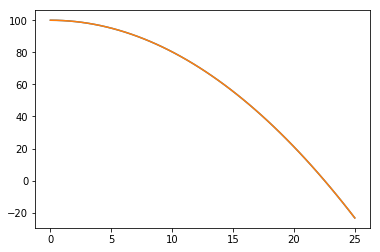

In [143]:
plt.plot(xn,yn)
plt.plot(5.0*tt,100.-(9.86/2.)*tt**2) #apli boli

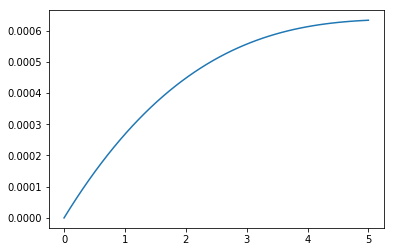

In [100]:
plt.plot(tt,np.abs(xn[:,0]-5.0*tt))

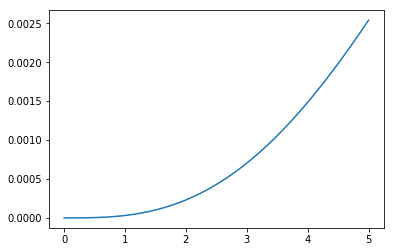

In [103]:
plt.plot(tt,np.abs(yn[:,0]-(100.-(9.86/2.)*tt**2)))

In [144]:
sub

## Τριβή
Το σύστημα των διαφορικών εξισώσεων είναι:
\begin{align}
&\frac{d}{dt}\big(M(t) V_y \big)=-M(t)g -a V_y\\
&\frac{d}{dt}\big(M(t) V_x \big)=0 -a V_x
\end{align}

$$
\dot{M}\dot{y}+M\dot{V}_y+Mg+a\dot{y}=0
$$

\begin{align}
\dot{y}&=V_y \\
\dot{V}_y%= -\dot{M}\dot{y}+M\dot{V}_y+Mg+a\dot{y}=0
\end{align}

In [157]:
eqy=sm.diff(Vy*M,t)+M*g+a*Vy
eqx=sm.diff(Vx*M,t)+a*Vx

In [179]:
dVy=sm.solve(eqy,sm.diff(Vy))[0]
dVx=sm.solve(eqx,sm.diff(Vx))[0]

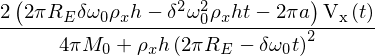

In [180]:
dVx

In [186]:
sub={R0:0.02,h:0.03,g:9.86,M0:0.020,w0:0.5*2.*np.pi,d:0.001,u0:5.0,rhox:1.5,Re:0.003,y0:100.,a:0.01}

In [187]:
dVyn=sm.lambdify((Vy,t),dVy.subs(sub))
dVxn=sm.lambdify((Vx,t),dVx.subs(sub))

In [188]:
sub

In [198]:
def DX(y,t):
    x,v=y
    dydt=[v,dVxn(v,t)]
    return dydt
def DY(y,t):
    y,v=y
    dydt=[v,dVyn(v,t)]
    return dydt

In [199]:
solx=odeint(DX,y0=[0.,5.],t=tt)
soly=odeint(DY,y0=[100.,0.],t=tt)

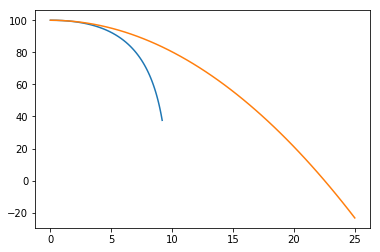

In [204]:
plt.plot(solx[:,0],soly[:,0])
plt.plot(5.0*tt,100.-(9.86/2.)*tt**2) #apli boli

In [189]:
Vxn=odeint(dVxn,y0=5.,t=tt)
Vyn=odeint(dVyn,y0=0.,t=tt)

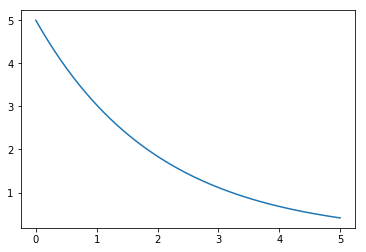

In [191]:
plt.plot(tt,Vxn)

In [ ]:
xn=

In [158]:
Vys=sm.dsolve(eqy,ics={Vy.subs(t,0):sm.Float(0)})#,ics={eqy.subs({t:0}):0})
Vys=Vys.subs('C1',0)
Vys

KeyError: (-R_E*\delta*\omega_0*\rho_x*h*V_x(t), c_, <class 'sympy.core.mul.Mul'>, <class 'sympy.core.symbol.Wild'>)